<a href="https://www.kaggle.com/code/faisalalbasu/spectrogram-windows-test?scriptVersionId=137567712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# small sampled data
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv'

--2023-07-22 12:51:41--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17946 (18K) [text/plain]
Saving to: ‘sample analysis.csv’

sample analysis.csv 100%[===================>]  17.53K  --.-KB/s    in 0.001s  

2023-07-22 12:51:41 (12.9 MB/s) - ‘sample analysis.csv’ saved [17946/17946]



In [3]:
# full data for maximimum signals
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum.csv'

--2023-07-22 12:51:43--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2175038 (2.1M) [text/plain]
Saving to: ‘maximum.csv’

maximum.csv         100%[===================>]   2.07M  --.-KB/s    in 0.08s   

2023-07-22 12:51:43 (27.5 MB/s) - ‘maximum.csv’ saved [2175038/2175038]



In [4]:
max_erg = pd.read_csv('/kaggle/working/maximum.csv', sep = ',', index_col = 'Time,ms')
max_erg.head()

,3,3.1,5,6,6.1,6.2,7,10,11,15,...,1880,1931,1961,1961.1,1962,1962.1,1963,1963.1,1964,1964.1
"Time,ms",,,,,,,,,,,,,,,,,,,,,
0.0,0.000004,-2.35,0.000013,-10.8,1.150000e-06,0.000003,-3.466499,-8.67,1.320000e-06,-3.10,...,0.000025,0.000029,-2.076184,-7.590125,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
0.5,0.000004,-2.47,0.000012,-11.1,9.600000e-07,0.000003,-3.523260,-9.02,1.120000e-06,-3.45,...,0.000025,0.000029,-2.106670,-7.468806,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
1.0,0.000004,-2.63,0.000012,-11.5,7.460000e-07,0.000002,-3.602958,-9.39,9.050000e-07,-3.83,...,0.000025,0.000028,-2.131098,-7.339658,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
1.5,0.000004,-2.80,0.000012,-11.9,5.060000e-07,0.000002,-3.705310,-9.79,6.810000e-07,-4.25,...,0.000025,0.000028,-2.149734,-7.204155,0.000002,0.000002,0.000022,0.000019,0.000016,0.00002
2.0,0.000003,-3.01,0.000012,-12.4,2.440000e-07,0.000001,-3.829635,-10.20,4.460000e-07,-4.70,...,0.000025,0.000027,-2.162955,-7.063886,0.000002,0.000002,0.000022,0.000019,0.000016,0.00002


In [5]:
data = pd.read_csv('/kaggle/working/sample analysis.csv', sep = ',', index_col='Time,ms')
data

,3,5,6,6.1,6.2,15,17,17.1
"Time,ms",,,,,,,,
0.0,-2.351363,0.000013,-10.800000,1.150000e-06,0.000003,-3.100000,1.470000e-06,0.000005
0.5,-2.473562,0.000012,-11.100000,9.600000e-07,0.000003,-3.450000,1.310000e-06,0.000005
1.0,-2.625094,0.000012,-11.500000,7.460000e-07,0.000002,-3.830000,1.130000e-06,0.000004
1.5,-2.804676,0.000012,-11.900000,5.060000e-07,0.000002,-4.250000,9.300000e-07,0.000004
2.0,-3.010519,0.000012,-12.400000,2.440000e-07,0.000001,-4.700000,7.250000e-07,0.000004
...,...,...,...,...,...,...,...,...
98.0,-2.117023,-0.000012,24.090590,3.810000e-06,0.000004,-8.207112,-8.300000e-06,-0.000011
98.5,-2.444991,-0.000013,23.955892,4.010000e-06,0.000004,-8.046144,-7.690000e-06,-0.000011
99.0,-2.729824,-0.000014,23.885146,4.220000e-06,0.000004,-7.833394,-7.080000e-06,-0.000011


In [6]:
NFFTS = [128, 64, 32, 16, 8, 4]
overlaps = [64, 32, 16, 8, 4, 2]
windows = ['hann', 'hamming', 'blackman', 'tukey', 'boxcar', 'bartlett', 'blackmanharris']

In [7]:
def plot_spectrogram(sig: str, nfft, noverlap, colormap):
    time_step = 0.005 # in seconds
    sample_freq = 1 / time_step
    sig = np.array(data[sig])
    
    assert sig.ndim  == 1
    assert nfft <= len(sig)
    
#     window = np.blackman(nfft)
    window = signal.get_window('taylor', nfft)
    
    Sxx, freqs, bins, im = plt.specgram(sig, Fs = sample_freq, NFFT = nfft, noverlap = noverlap, cmap = colormap, window = window)
    plt.colorbar().set_label('Power')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    return Sxx

In [8]:
# plot_spectrogram('3', 32, 16, 'jet')

In [9]:
# freqs, times, Sxx = signal.spectrogram(np.array(data['3']), fs = 200, nperseg = 32, noverlap = 16, window = 'taylor')
# Sxx.shape

In [10]:
# freqs

In [11]:
# times

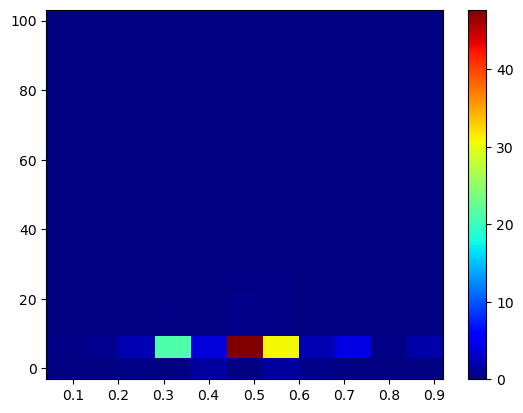

In [12]:
def compute_spectrogram(sig, nperseg, noverlap, window):
    time_step = 0.005
    sample_freq = 1 / time_step
    sig = np.array(data[sig])
    freqs, times, Sxx = signal.spectrogram(sig, fs = sample_freq, nperseg = nperseg, noverlap = noverlap, window = window)
    
    return freqs, times, Sxx

freqs, times, Sxx = compute_spectrogram('3', nperseg = 32, noverlap = 16, window = 'tukey')

plt.pcolormesh(times, freqs, Sxx, cmap = 'jet')
plt.colorbar()

In [54]:
def get_features(sig, nperseg, noverlap, window):
    freqs, times, Sxx = compute_spectrogram(sig, nperseg, noverlap, window)
    num_t, num_f = Sxx.shape
    quadrant1 = Sxx[:num_t//2, :num_f//2]  # Top-left quadrant
    quadrant2 = Sxx[:num_t//2, num_f//2:]  # Top-right quadrant
    quadrant3 = Sxx[num_t//2:, :num_f//2]  # Bottom-left quadrant
    quadrant4 = Sxx[num_t//2:, num_f//2:]  # Bottom-right quadrant
#     print(f"q1: {quadrant1}, q2: {quadrant2}, q3: {quadrant3}, q4: {quadrant4}")

    
    q1spectrum = quadrant1.flatten()
    q2spectrum = quadrant2.flatten()
    q3spectrum = quadrant3.flatten()
    q4spectrum = quadrant4.flatten()
#     print(f"q1s: {q1spectrum}, q2s: {q2spectrum}, q3s: {q3spectrum}, q4s: {q4spectrum}")

#     if len(q1spectrum) == 0:
#         print(f"empty array at {sig}, {q1spectrum}")
#         return

    q1bmin = np.min(q1spectrum)
    q1bmedian = np.median(q1spectrum)
    q1bmax = np.max(q1spectrum)
    q1bmean = np.mean(q1spectrum)
    
    q2bmin = np.min(q2spectrum)
    q2bmedian = np.median(q2spectrum)
    q2bmax = np.max(q2spectrum)
    q2bmean = np.mean(q2spectrum)
    
    q3bmin = np.min(q3spectrum)
    q3bmedian = np.median(q3spectrum)
    q3bmax = np.max(q3spectrum)
    q3bmean = np.mean(q3spectrum)
    
    q4bmin = np.min(q4spectrum)
    q4bmedian = np.median(q4spectrum)
    q4bmax = np.max(q4spectrum)
    q4bmean = np.mean(q4spectrum)
    
    return q1bmin, q1bmedian, q1bmax, q1bmean, q2bmin, q2bmedian, q2bmax, q2bmean, q3bmin, q3bmedian, q3bmax, q3bmean, q4bmin, q4bmedian, q4bmax, q4bmean

In [37]:
get_features('17.1', 32, 16, 'tukey')

(1.8133730886700244e-19,
 7.188442040843368e-15,
 1.198293319104879e-11,
 5.905956941378092e-13,
 1.9860966841123246e-17,
 2.312997255440055e-14,
 3.0767548055768595e-11,
 1.0534772301170084e-12,
 8.12950829017152e-21,
 4.255835736651426e-18,
 6.836571902260588e-16,
 3.663757166617236e-17,
 7.785910866270358e-21,
 9.593435260689975e-18,
 1.8679275424284555e-15,
 7.672423400224923e-17)

In [15]:
# def get_parameters():
#     size, overlap, name = None, None, None
#     for n in NFFTS:
#         size = n
#     for o in overlaps:
#         overlap = o
#     for w in windows:
#         name = w
#     # use random.choice instead of loop
#     # then loop through the signals instead
#     return size, overlap, name

# print(get_parameters())

In [16]:
import random
def get_parameters():
    window_type = random.choice(windows)
    
    window_size = random.choice(NFFTS)

    overlap = random.choice(overlaps)
    
    while overlap >= window_size:
        overlap = random.choice(overlaps)

#     if overlap >= window_size:
#         window_size = random.choice(NFFTS)
#         overlap = random.choice(overlaps)
#     else:
#         return window_size, overlap, window_type
#         print(window_size, overlap, window_type)


    
    return window_size, overlap, window_type

#     print(window_size, overlap, window_type)
    
# get_parameters()

In [55]:
dfeatures = pd.DataFrame(columns = ['params', 'q1bmin', 'q1bmedian', 'q1bmax', 'q1bmean', 'q2bmin', 'q2bmedian', 'q2bmax', 'q2bmean', 'q3bmin', 'q3bmedian', 'q3bmax', 'q3bmean', 'q4bmin', 'q4bmedian', 'q4bmax', 'q4bmean', 'pat_no'])
dfeatures

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean,pat_no


In [56]:
for _ in range(len(data.columns)):
    window_size, overlap, window_type = get_parameters()
    for col in data.columns:
        
        q1bmin, q1bmedian, q1bmax, q1bmean, q2bmin, q2bmedian, q2bmax, q2bmean, q3bmin, q3bmedian, q3bmax, q3bmean, q4bmin, q4bmedian, q4bmax, q4bmean = get_features(str(col), window_size, overlap, window_type)
        
        new_dict = {'params': f'{window_type}{window_size}{overlap}', 'q1bmin': q1bmin, 'q1bmedian': q1bmedian, 'q1bmax': q1bmax, 'q1bmean': q1bmax, 'q2bmin': q2bmin, 'q2bmedian': q2bmedian, 'q2bmax': q2bmax, 'q2bmean': q2bmax, 'q3bmin': q3bmin, 'q3bmedian': q3bmedian, 'q3bmax': q3bmax, 'q3bmean': q3bmax, 'q4bmin': q4bmin, 'q4bmedian': q4bmedian, 'q4bmax': q4bmax, 'q4bmean': q4bmax, 'pat_no': col}
        new_features = pd.DataFrame(data = new_dict, index = range(0, len(new_dict)))
        dfeatures = pd.concat([dfeatures, new_features], ignore_index = True)

In [ ]:
# new_features_list = []
# for col in data.columns:
#     print(col)
#     window_size, overlap, window_type = get_parameters()
#     bmin, bmedian, bmax, bmean = get_features(str(col), window_size, overlap, window_type)
#     new_dict = {'params': f'{window_type}{window_size}{overlap}', 'bmin': bmin, 'bmedian': bmedian, 'bmax': bmax, 'bmean': bmean, 'pat_no': col}
#     new_features = pd.DataFrame(data = new_dict, index = range(0, len(new_dict)))
#     new_features_list.append(new_features)
# dfeatures = pd.concat(new_features_list, ignore_index = True)
    
# # dfeatures

In [ ]:
len(data.columns)

In [57]:
dfeatures

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean,pat_no
0,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
1,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
2,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
3,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
4,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,boxcar644,2.017870e-45,1.374856e-13,3.074587e-12,3.074587e-12,1.098618e-44,4.038492e-13,1.477190e-10,1.477190e-10,1.079678e-14,2.575916e-14,4.403828e-14,4.403828e-14,3.206778e-14,7.538952e-14,1.358382e-13,1.358382e-13,17.1
1148,boxcar644,2.017870e-45,1.374856e-13,3.074587e-12,3.074587e-12,1.098618e-44,4.038492e-13,1.477190e-10,1.477190e-10,1.079678e-14,2.575916e-14,4.403828e-14,4.403828e-14,3.206778e-14,7.538952e-14,1.358382e-13,1.358382e-13,17.1
1149,boxcar644,2.017870e-45,1.374856e-13,3.074587e-12,3.074587e-12,1.098618e-44,4.038492e-13,1.477190e-10,1.477190e-10,1.079678e-14,2.575916e-14,4.403828e-14,4.403828e-14,3.206778e-14,7.538952e-14,1.358382e-13,1.358382e-13,17.1
1150,boxcar644,2.017870e-45,1.374856e-13,3.074587e-12,3.074587e-12,1.098618e-44,4.038492e-13,1.477190e-10,1.477190e-10,1.079678e-14,2.575916e-14,4.403828e-14,4.403828e-14,3.206778e-14,7.538952e-14,1.358382e-13,1.358382e-13,17.1


- Separate the spectrograms into 4 segments: Divide the array into 4 segments.

- Make sure the features are arranged as they are in the targets row-wise

In [58]:
dfeatures.drop_duplicates().head(20)

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean,pat_no
0,blackman3216,4.225847e-08,1.882494e-04,6.748337e+00,6.748337e+00,3.078922e-07,2.471151e-04,1.540575e+01,1.540575e+01,6.833604e-13,1.334984e-08,5.406484e-06,5.406484e-06,7.261622e-12,6.371319e-08,1.339592e-05,1.339592e-05,3
18,blackman3216,4.554648e-20,1.513169e-16,3.891034e-12,3.891034e-12,1.199034e-19,4.302796e-16,8.375472e-12,8.375472e-12,5.709573e-21,4.169926e-19,7.229829e-18,7.229829e-18,6.541682e-23,3.505755e-19,2.640819e-17,2.640819e-17,5
36,blackman3216,1.050494e-07,1.098956e-03,4.118228e+01,4.118228e+01,7.397461e-07,9.502396e-04,9.050342e+01,9.050342e+01,2.117391e-10,9.672819e-08,3.122865e-05,3.122865e-05,2.725350e-12,1.380914e-07,8.156508e-05,8.156508e-05,6
54,blackman3216,2.773866e-21,2.164086e-16,6.879027e-12,6.879027e-12,5.518166e-19,1.592769e-16,1.498616e-11,1.498616e-11,1.605373e-21,5.632310e-19,2.322303e-17,2.322303e-17,1.150298e-20,3.883289e-18,4.554467e-17,4.554467e-17,6.1
72,blackman3216,1.135399e-21,4.501707e-16,1.355079e-11,1.355079e-11,3.407512e-21,1.899596e-16,2.319372e-11,2.319372e-11,4.101606e-22,2.621751e-19,2.124681e-17,2.124681e-17,1.271920e-19,5.232414e-18,5.126980e-17,5.126980e-17,6.2
90,blackman3216,5.818693e-08,4.043917e-04,1.000708e+01,1.000708e+01,1.664072e-06,5.219220e-04,2.803182e+01,2.803182e+01,6.066720e-11,2.927309e-08,5.658850e-06,5.658850e-06,2.406207e-12,1.504291e-07,2.454756e-05,2.454756e-05,15
108,blackman3216,6.111923e-20,1.936295e-16,3.872794e-12,3.872794e-12,1.119575e-19,8.865019e-17,8.438685e-12,8.438685e-12,1.310277e-23,1.445424e-19,2.466089e-17,2.466089e-17,3.317674e-22,1.845851e-18,1.938343e-17,1.938343e-17,17
126,blackman3216,5.294083e-21,1.683142e-16,4.170634e-12,4.170634e-12,1.415716e-19,1.206272e-16,9.747548e-12,9.747548e-12,1.640904e-21,2.489138e-19,2.584080e-17,2.584080e-17,5.585405e-21,4.977635e-18,2.879768e-17,2.879768e-17,17.1
144,hann642,3.808762e-07,3.264087e-05,8.751028e-01,8.751028e-01,1.170980e-06,1.358532e-04,1.356575e+02,1.356575e+02,6.738455e-11,1.475376e-08,2.532575e-07,2.532575e-07,7.049891e-12,7.015232e-08,1.883629e-06,1.883629e-06,3
162,hann642,7.065786e-19,4.755318e-17,2.458841e-13,2.458841e-13,4.753273e-19,5.783640e-17,6.530342e-11,6.530342e-11,8.500147e-21,8.476542e-20,8.198602e-19,8.198602e-19,8.080874e-21,5.468052e-19,1.559850e-17,1.559850e-17,5


In [ ]:
dfeatures.head(20)